# K Means Cluster
attempt 1 to cluster, with just the spectrogram 

In [2]:
from pathlib import Path
import librosa, librosa.display
import numpy as np, scipy, matplotlib.pyplot as plt, sklearn, librosa, mir_eval, IPython.display, urllib
from mpl_toolkits.mplot3d import Axes3D

# Create Spectrograms
creating a list of spectrograms which we will perform clustering on 

* we need to create consistent data, this means that all arrays in which we create must have the same shape



In [3]:
melspectrograms = []
for p in Path().glob('songset/*.mp3'):
    y, sr = librosa.load(p, offset=10.0, duration=5.0)
    melspectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)
    y_dB = librosa.power_to_db(melspectrogram, ref=np.max)
    melspectrograms.append(y_dB)

In [4]:
# we need to flatten the spectrograms so that they can be processed properly 
flattened = []
for spectrogram in melspectrograms:
    flattened.append(spectrogram.flatten())

scaler = sklearn.preprocessing.StandardScaler()
scaler.fit(flattened)
features_scaled = scaler.transform(flattened)
print(features_scaled.shape)
print(features_scaled.min(axis=0))
print(features_scaled.max(axis=0))


(5, 27648)
[-1.0854664  -1.21498451 -1.10081882 ... -0.9167262  -0.89743027
 -1.05649108]
[1.44927907 1.45922132 1.65626948 ... 1.29946373 1.24029247 1.49400419]


# Trying to visualize the data 

(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)


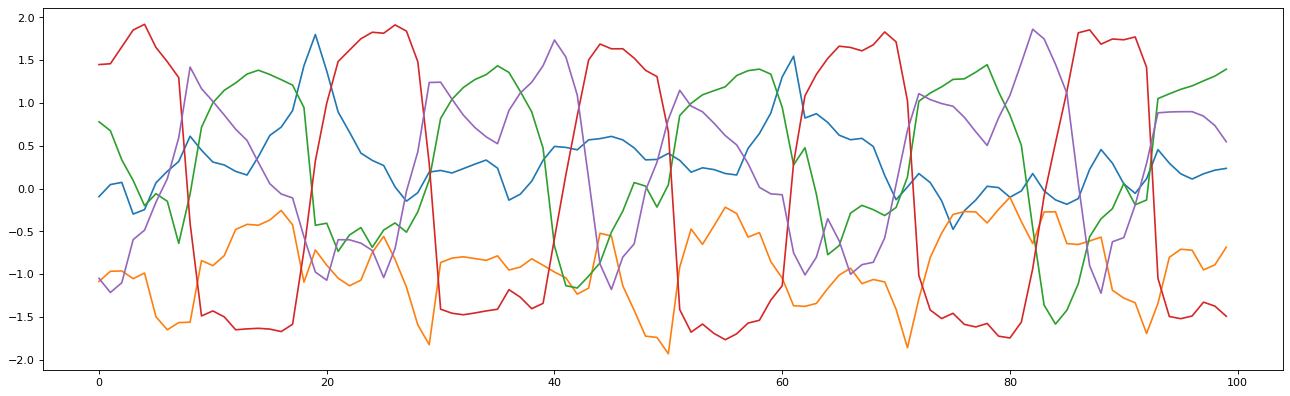

In [14]:
fig = plt.figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')

for flat in features_scaled: 
    x = []
    y = []
    print(spectrogram.shape)
    for i in range(100):
        x.append(i)
    plt.plot(x, flat[:100], label='$y = {i}x + {i}$'.format(i=i))

# Clustering the above normalized data

In [29]:
model = sklearn.cluster.KMeans(n_clusters=2)
labels = model.fit_predict(features_scaled)
print(labels)

[0 0 0 0 1]


(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)


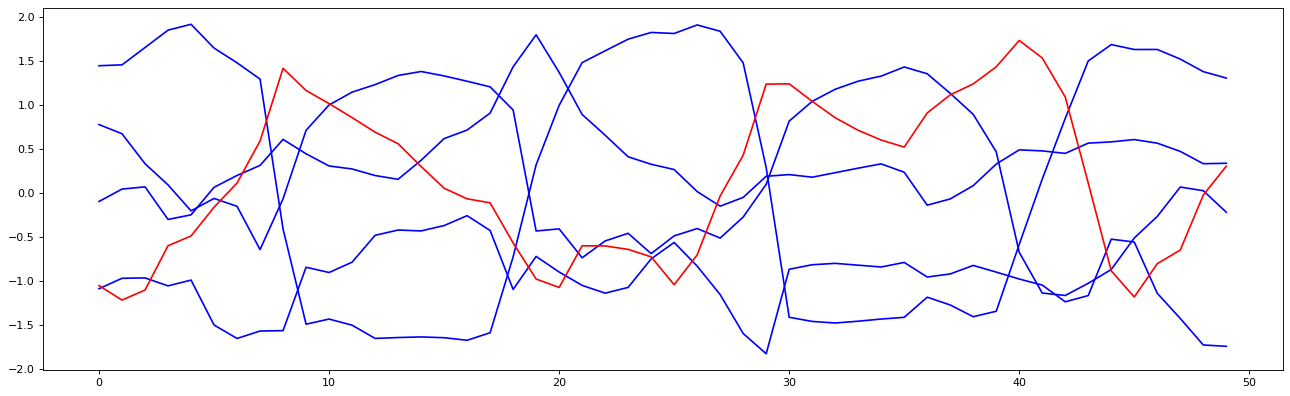

In [37]:
fig = plt.figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')

for j in range(len(features_scaled)): 
    x = []
    y = []
    print(spectrogram.shape)
    for i in range(50):
        x.append(i)
    if labels[j] == 0.0: 
        plt.plot(x, features_scaled[j][:50], c='b')
    else: 
        plt.plot(x, features_scaled[j][:50], c='r')

# Affinity Propagation 
clustering without defining the number of clusters beforehand 

In [36]:
model = sklearn.cluster.AffinityPropagation()
labels = model.fit_predict(features_scaled)
centers = model.cluster_centers_
print(centers)
print(labels)

[[ 0.78053083  0.67589633  0.33549345 ...  1.29946373  1.19846251
   0.72424061]
 [-1.05037854 -1.21498451 -1.10081882 ... -0.9167262  -0.89743027
  -1.05649108]]
[0 0 0 0 1]
